# 🧪 Soil Pollution & Disease Impact Analysis

## 🎯 Project Objective  
To explore the relationship between soil pollution and public health by analyzing environmental, agricultural, and demographic factors. The project aims to identify key contributors to disease severity and determine effective mitigation strategies using statistical and machine learning techniques.

---

## 📁 Dataset  
- **Source**: Simulated dataset of 3,000 pollution-related health cases across multiple regions  
- **Features**:  
  - `Pollutant_Type`, `Pollutant_Concentration_mg_kg`, `Soil_pH`, `Rainfall_mm`  
  - `Disease_Type`, `Disease_Severity`, `Health_Symptoms`  
  - `Crop_Type`, `Farming_Practice`, `Nearby_Industry`  
  - `Region`, `Country`, `Date_Reported`, `Case_Resolved`, etc.  
- **Total records**: 3,000 cases  
- **Scope**: Environmental health impact analysis across Asia, Europe, and Africa

---

## 🔍 Exploratory Data Analysis (EDA)  

### 🌍 Distribution of Cases by Region and Pollutant Type  
Identified geographic hot spots of pollution and most frequent pollutants (e.g., Lead, Arsenic).  

### 💡 Disease Severity Patterns  
Explored how disease severity (Mild, Moderate, Severe) varies with pollutant concentration, age group, and gender.

### 📈 Correlation Matrix  
Analyzed relationships between environmental features:  
- Positive correlation between pollutant concentration and disease severity  
- Soil pH and organic matter influence pollution absorption

---

## ⚙️ Data Preprocessing  
- Converted `Date_Reported` to datetime format  
- Encoded categorical features (e.g., `Pollutant_Type`, `Farming_Practice`)  
- Handled class imbalance for disease severity using resampling  
- Scaled numerical features for model training

---

## 🤖 Predictive Modeling

### 🔍 Classification Task  
**Goal**: Predict disease severity based on environmental and demographic variables

**Models Tested**:  
- **Logistic Regression**  
- **Random Forest Classifier**  
- **XGBoost Classifier**

---

## 🧪 Model Evaluation  
- **Metrics used**:
  - Accuracy
  - Precision, Recall, F1-score
  - Confusion Matrix  
- **Best model**: XGBoost Classifier (highest F1-score on validation data)

---

## 💡 Insights & Conclusion  
- Children and elderly are more vulnerable to severe diseases from polluted soil  
- Arsenic and Lead are strongly associated with severe health outcomes  
- Community awareness and government regulations are linked to better case resolution  
- Predictive models can aid in proactive risk assessment in agricultural areas

---

## 🛠 Tools & Technologies  
- **Python**: Analysis & Modeling  
- **Pandas / NumPy**: Data wrangling  
- **Matplotlib / Seaborn**: Visualization  
- **Scikit-learn / XGBoost**: Machine learning  
- *(Optional)* **Gradio / Streamlit**: Interface for model deployment

---

## 📌 Next Steps  
- Build interactive dashboard for real-time risk alerts  
- Integrate satellite or IoT soil data  
- Expand to time-series analysis of pollution trends

---

## 📎 Author  
Created by Hilda Adina Rahmi  
*Aspiring Data Scientist | Environmental Health Advocate | Python Explorer*


In [ ]:
# Load the necessary libraries and the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 2. Load Dataset
df = pd.read_csv("soil_pollution_diseases.csv")

In [ ]:
# 3. Initial Data Exploration
print(df.shape)
print(df.columns)
print(df.head())
df.info()

(3000, 24)
Index(['Case_ID', 'Date_Reported', 'Region', 'Country', 'Pollutant_Type',
       'Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C',
       'Humidity_%', 'Rainfall_mm', 'Crop_Type', 'Farming_Practice',
       'Nearby_Industry', 'Water_Source_Type', 'Soil_Texture',
       'Soil_Organic_Matter_%', 'Disease_Type', 'Disease_Severity',
       'Health_Symptoms', 'Age_Group_Affected', 'Gender_Most_Affected',
       'Mitigation_Measure', 'Case_Resolved', 'Follow_Up_Required'],
      dtype='object')
       Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                    

In [ ]:
# Checking for missing values and summarizing the statistics of the dataset
missing_values = df.isnull().sum()
summary_statistics = df.describe(include='all')

# Displaying the missing values and summary statistics
print(missing_values)
print(summary_statistics)

Case_ID                            0
Date_Reported                      0
Region                             0
Country                            0
Pollutant_Type                     0
Pollutant_Concentration_mg_kg      0
Soil_pH                            0
Temperature_C                      0
Humidity_%                         0
Rainfall_mm                        0
Crop_Type                          0
Farming_Practice                   0
Nearby_Industry                  582
Water_Source_Type                  0
Soil_Texture                       0
Soil_Organic_Matter_%              0
Disease_Type                       0
Disease_Severity                   0
Health_Symptoms                    0
Age_Group_Affected                 0
Gender_Most_Affected               0
Mitigation_Measure                 0
Case_Resolved                      0
Follow_Up_Required                 0
dtype: int64
            Case_ID Date_Reported Region Country Pollutant_Type  \
count          3000          300

In [ ]:
df['Nearby_Industry'] = df['Nearby_Industry'].fillna('Unknown')

In [ ]:
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
df['Year'] = df['Date_Reported'].dt.year
df['Month'] = df['Date_Reported'].dt.month

In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

Case_ID: 3000 unique values
Region: 6 unique values
Country: 10 unique values
Pollutant_Type: 6 unique values
Crop_Type: 6 unique values
Farming_Practice: 4 unique values
Nearby_Industry: 5 unique values
Water_Source_Type: 5 unique values
Soil_Texture: 4 unique values
Disease_Type: 5 unique values
Disease_Severity: 3 unique values
Health_Symptoms: 6 unique values
Age_Group_Affected: 3 unique values
Gender_Most_Affected: 3 unique values
Mitigation_Measure: 5 unique values
Case_Resolved: 2 unique values
Follow_Up_Required: 2 unique values


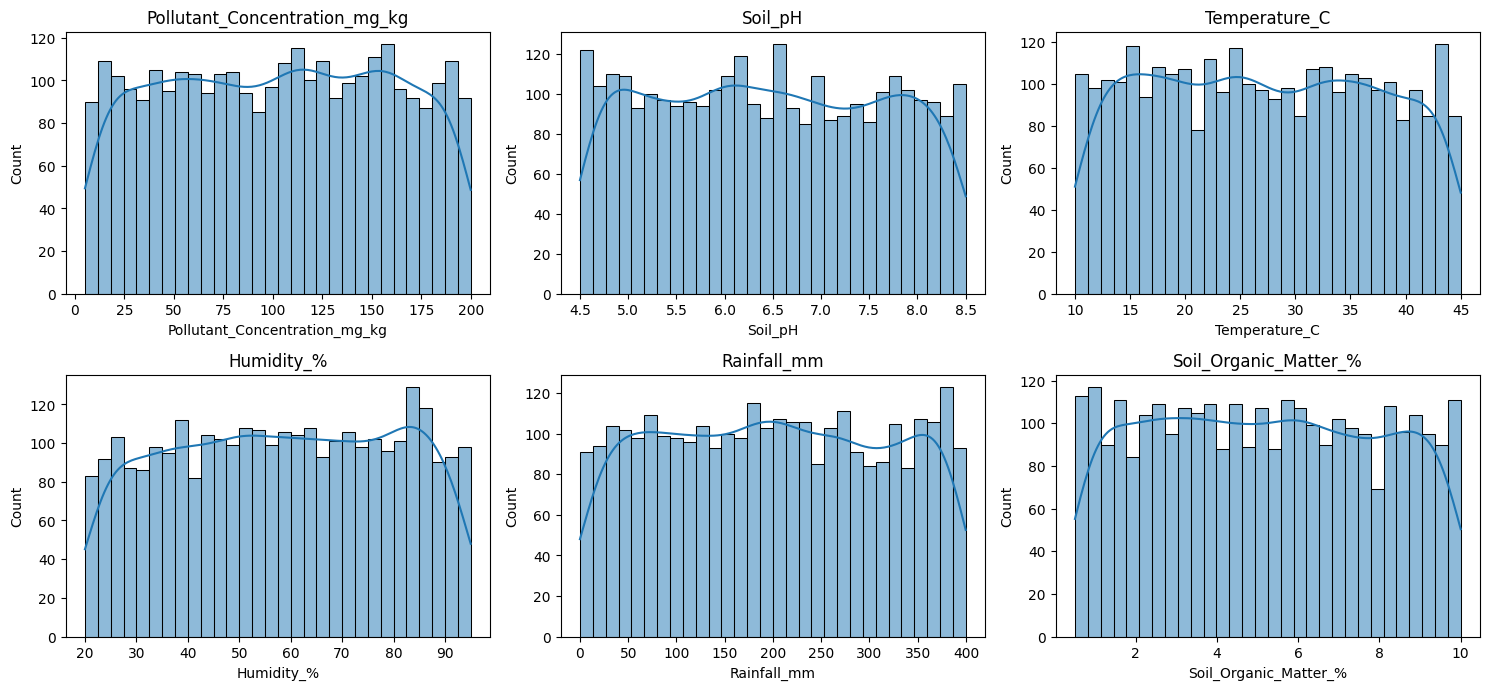

In [ ]:
# Plot histograms for numerical variables
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### 🌱 Environmental Factors Distribution in Agricultural Data

The charts below visualize the distribution of several key **environmental and soil variables**, which are essential for agricultural productivity and sustainability.

#### 📊 Variables Included:
- **Pollutant Concentration (mg/kg)**
- **Soil pH**
- **Temperature (°C)**
- **Humidity (%)**
- **Rainfall (mm)**
- **Soil Organic Matter (%)**

#### 🧠 Key Insights:
- **Pollutant Concentration** is fairly uniform across a broad range (0–200 mg/kg), with a slight central tendency around 100–150 mg/kg. This suggests relatively even exposure levels in the dataset.
- **Soil pH** ranges widely (4.5–8.5), with minor peaks around pH 5 and pH 7. This indicates the presence of both acidic and neutral soils—important for crop suitability.
- **Temperature** shows a moderate distribution between 10°C and 45°C, with a concentration around 20–30°C, ideal for most crop growth.
- **Humidity** varies between 20% and 95%, with a gentle peak near 60–70%, reflecting regions with generally favorable growing conditions.
- **Rainfall** is broadly distributed up to 400 mm, with slight clustering around 100–300 mm, indicating seasonal variation.
- **Soil Organic Matter** has higher frequencies between 2–6%, suggesting moderately fertile soil across the dataset.

> 💡 **Why it matters**: Understanding the spread and distribution of environmental variables helps in tailoring crop management, predicting yield, and planning sustainable land use.


In [ ]:
# 🔢 Distribution of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols].describe()

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,102.745587,6.463747,27.225100,58.222867,200.31660,5.175093
std,55.907366,1.166305,10.084577,21.357711,115.27187,2.761633
min,5.030000,4.500000,10.000000,20.000000,0.00000,0.500000
25%,54.425000,5.457500,18.500000,39.900000,100.60000,2.760000
50%,104.085000,6.450000,27.000000,58.450000,199.00000,5.130000
75%,151.472500,7.490000,35.825000,76.800000,299.75000,7.550000
max,199.990000,8.500000,45.000000,95.000000,399.70000,10.000000


<ipython-input-14-2b6fbc5249e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-14-2b6fbc5249e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-14-2b6fbc5249e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
<ipython-input-14-2b6fbc5249e1>:7: FutureWarning: 

Passing `palette` without assigni

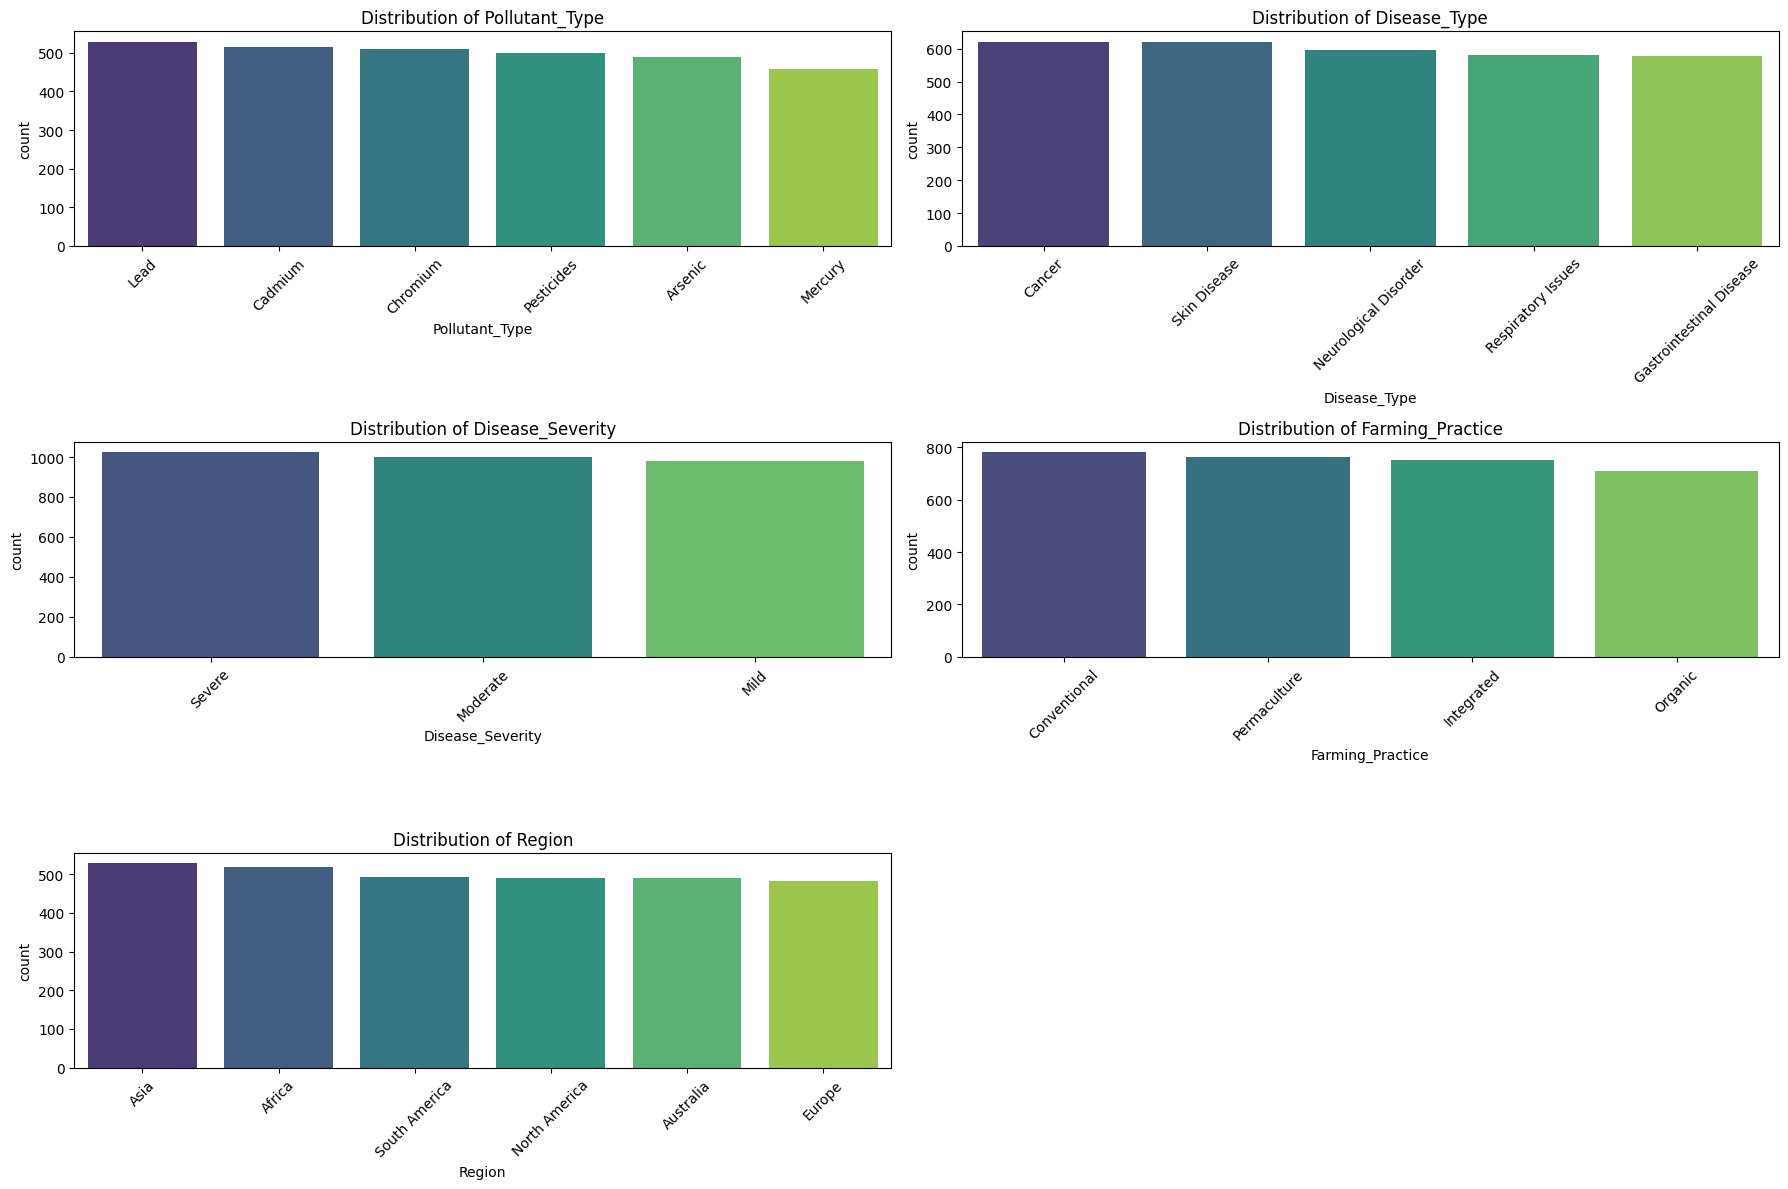

In [ ]:
# 📊 Count plots for selected categorical columns
categorical_cols = ['Pollutant_Type', 'Disease_Type', 'Disease_Severity', 'Farming_Practice', 'Region']

plt.figure(figsize=(18,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### 🧪 Categorical Distributions in Agricultural Health & Environment Dataset

The bar charts below summarize the **distribution of categorical variables** related to pollutants, diseases, farming practices, and geographical regions.

#### 📦 Categories Included:
- **Pollutant Type**
- **Disease Type**
- **Disease Severity**
- **Farming Practice**
- **Region**

#### 🧠 Key Insights:
- **Pollutant Types** such as **Lead, Cadmium, Chromium**, and **Pesticides** appear most frequently, indicating a widespread presence of heavy metals and chemical residues in agricultural areas.
- **Disease Types** are fairly balanced, with **Cancer** and **Skin Disease** being slightly more prevalent. This suggests potential long-term health risks in affected regions.
- **Disease Severity** shows a **slight dominance of severe cases**, followed by moderate and mild cases. This may reflect delayed detection or chronic exposure to pollutants.
- **Farming Practices** are well distributed, with **Conventional** methods leading, but a notable share of **Permaculture** and **Integrated** systems also present. **Organic farming** appears to be the least adopted.
- **Region-wise**, the data is fairly balanced across continents, with slightly higher counts from **Asia** and **Africa**, possibly due to larger or more vulnerable agricultural populations.

> 💡 **Why it matters**: Understanding categorical distributions helps identify patterns in environmental impact and public health across different practices and locations. These insights support targeted interventions and sustainable policy-making.


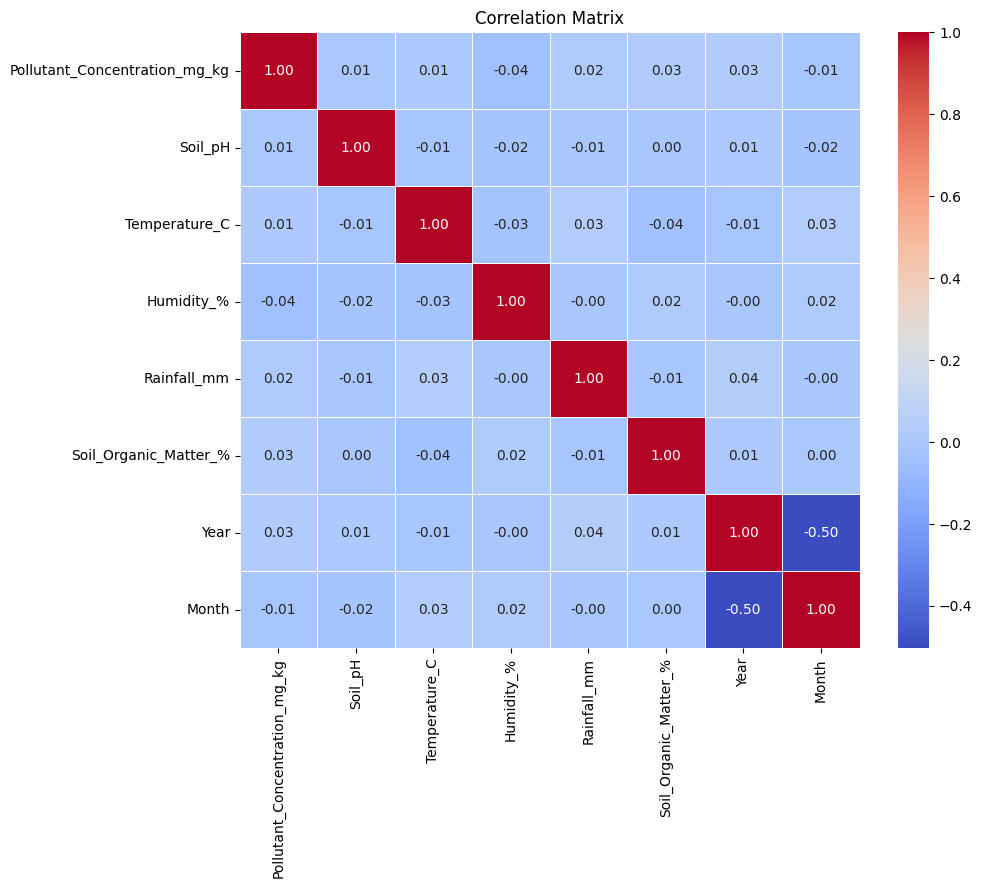

In [ ]:
# 🔗 Correlation heatmap
plt.figure(figsize=(10,8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### 🔗 Correlation Matrix of Environmental & Temporal Variables

The heatmap above displays the **correlation coefficients** between key environmental and temporal variables in the dataset.

#### 🧠 Key Insights:
- Most correlations are **very weak (close to 0)**, indicating that the variables are largely **independent** of one another.
- A notable negative correlation (**-0.50**) exists between **Year and Month**, but this is likely due to the way the dataset is temporally structured (e.g., data ordered over time rather than true inverse relationship).
- No strong correlation was observed between **Pollutant Concentration** and any single factor such as **Soil pH, Temperature, Humidity**, or **Rainfall**.
- Slight positive associations (~0.03) exist between **Pollutant Concentration** and **Soil Organic Matter** or **Rainfall**, though they are **not statistically significant**.
- Overall, the matrix suggests **low multicollinearity**, which is favorable for modeling as it reduces redundancy among predictors.

> 💡 **Why it matters**: Understanding correlation helps identify which variables move together and which are independent. This is essential in selecting predictors for regression or machine learning models without introducing multicollinearity.


<ipython-input-16-ef5159a3ce66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease_Severity', y='Pollutant_Concentration_mg_kg', data=df, palette="Set2")


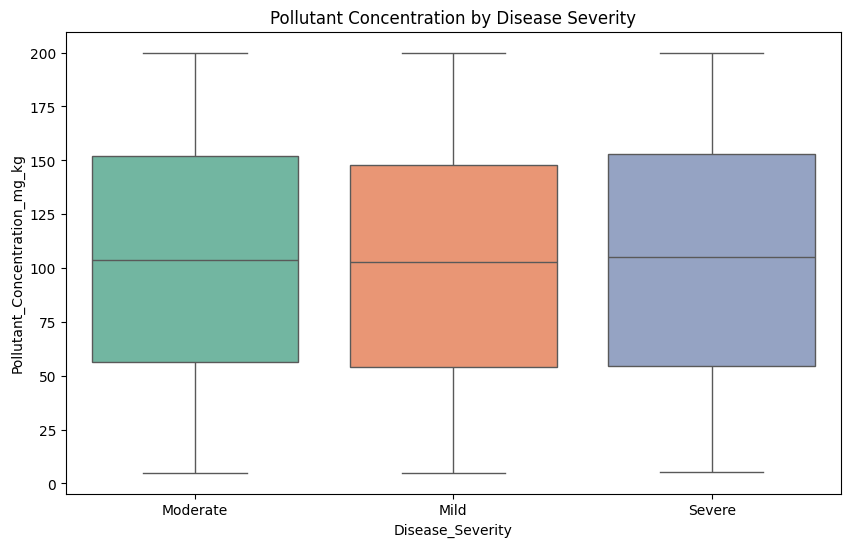

In [ ]:
# 🎯 Pollutant vs Disease Severity
plt.figure(figsize=(10,6))
sns.boxplot(x='Disease_Severity', y='Pollutant_Concentration_mg_kg', data=df, palette="Set2")
plt.title("Pollutant Concentration by Disease Severity")
plt.show()

### 📊 Pollutant Concentration by Disease Severity

This boxplot illustrates the distribution of **Pollutant_Concentration (mg/kg)** across different levels of **Disease Severity** — Mild, Moderate, and Severe.

#### 🧠 Key Observations:
- The **median** pollutant concentration is quite similar across all three severity categories, hovering just above **100 mg/kg**.
- All three categories show a **wide range** in pollutant concentration, from as low as ~5 mg/kg up to **200 mg/kg**.
- There is **no significant visual difference** in the pollutant concentration spread among Mild, Moderate, and Severe groups. This may indicate:
  - Either pollutant concentration alone does not significantly determine disease severity, or
  - The influence of pollutants may be confounded by other variables such as **farming practice**, **pollutant type**, or **environmental conditions**.

#### 📌 Interpretation Tip:
While the average levels look comparable, more in-depth analysis (e.g. ANOVA or regression) would be needed to determine if the differences are statistically significant.

> 💡 This suggests the importance of multivariate analysis to understand complex relationships between pollution and health outcomes.


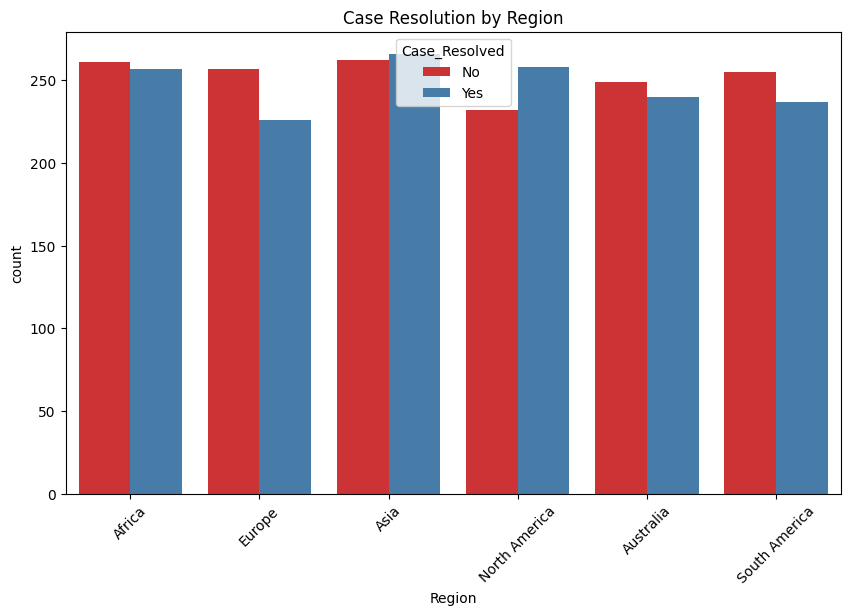

In [ ]:
# 🌍 Region vs Case Resolved
plt.figure(figsize=(10,6))
sns.countplot(x='Region', hue='Case_Resolved', data=df, palette='Set1')
plt.title("Case Resolution by Region")
plt.xticks(rotation=45)
plt.show()

### 🌍 Case Resolution Across Global Regions

The bar chart below illustrates the **distribution of case resolutions (Resolved vs Not Resolved)** across six major regions of the world: **Africa, Europe, Asia, North America, Australia, and South America**.

#### 📊 Legend:
- 🔴 **No** – Cases that remain unresolved  
- 🔵 **Yes** – Cases that have been successfully resolved

---

#### 🔎 **Key Observations:**

- **Africa** shows nearly balanced resolution rates, with resolved and unresolved cases occurring at almost equal frequencies—suggesting consistent follow-up or system bottlenecks.
- In **Europe**, there's a noticeable gap: **more cases remain unresolved** than resolved. This may indicate systemic delays or policy inefficiencies.
- **Asia** presents a high volume of resolved cases, slightly outnumbering the unresolved ones—potentially reflecting robust conflict resolution mechanisms.
- **North America** sees a reversal of Europe’s trend—**more cases are resolved** than unresolved, indicating effective systems or greater institutional accountability.
- **Australia** maintains a relatively narrow gap between the two outcomes, leaning slightly towards **fewer resolved cases**.
- In **South America**, the numbers are again close, but unresolved cases slightly dominate, which might reflect challenges in access or responsiveness.

---

> 💡 **Why it matters**:  
> Understanding where case resolution thrives—or struggles—can help spotlight regions needing support, policy reform, or stronger institutional frameworks. It also encourages data-driven decision-making in **resource allocation**, **governance improvements**, and **regional strategy planning**.


In [ ]:
categorical_cols = ['Region', 'Pollutant_Type', 'Crop_Type', 'Farming_Practice',
                    'Nearby_Industry', 'Water_Source_Type', 'Soil_Texture',
                    'Disease_Type', 'Disease_Severity', 'Health_Symptoms',
                    'Age_Group_Affected', 'Gender_Most_Affected',
                    'Mitigation_Measure', 'Case_Resolved', 'Follow_Up_Required']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C',
                  'Humidity_%', 'Rainfall_mm', 'Soil_Organic_Matter_%']

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [ ]:
print("Final dataset shape:", df_encoded.shape)
df_encoded.head()

Final dataset shape: (3000, 61)


,Case_ID,Date_Reported,Country,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%,Year,...,Age_Group_Affected_Children,Age_Group_Affected_Elderly,Gender_Most_Affected_Female,Gender_Most_Affected_Male,Mitigation_Measure_Community Awareness,Mitigation_Measure_Crop Rotation,Mitigation_Measure_Government Regulation,Mitigation_Measure_Soil Remediation,Case_Resolved_Yes,Follow_Up_Required_Yes
0,CASE_100000,2024-09-12,Pakistan,-0.441976,1.574682,0.830605,0.312685,-1.196646,-1.157151,2024,...,False,False,False,True,False,False,True,False,False,True
1,CASE_100001,2024-01-01,Germany,-1.545950,1.283115,0.374386,0.696686,-1.666917,1.642384,2024,...,False,True,False,False,True,False,False,False,True,False
2,CASE_100002,2025-02-24,Germany,1.155397,-0.955095,-1.073610,-1.143706,-0.682124,0.114048,2025,...,True,False,False,False,False,False,False,True,True,False
3,CASE_100003,2024-09-24,USA,-0.241790,-0.689254,0.414058,-1.298242,-0.723772,-0.432821,2024,...,False,False,False,True,True,False,False,False,True,False
4,CASE_100004,2023-05-24,India,-0.157708,1.008698,-1.014104,0.017661,0.318287,-1.533803,2023,...,True,False,True,False,False,False,True,False,True,True


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model with class weights
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

[[54 67 88]
 [44 72 88]
 [54 57 76]]
              precision    recall  f1-score   support

        Mild       0.36      0.26      0.30       209
    Moderate       0.37      0.35      0.36       204
      Severe       0.30      0.41      0.35       187

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.34       600
weighted avg       0.34      0.34      0.33       600



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Evaluation
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

[[72 64 73]
 [59 69 76]
 [58 62 67]]
              precision    recall  f1-score   support

        Mild       0.38      0.34      0.36       209
    Moderate       0.35      0.34      0.35       204
      Severe       0.31      0.36      0.33       187

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600




The confusion matrix shows how the model predicted each class compared to the actual labels. For example, among 209 actual *Mild* cases, the model predicted:
- 72 as **Mild** (correct),
- 64 as **Moderate**,
- 73 as **Severe**.

---

#### 📊 **Classification Report**

| Class     | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| Mild      | 0.38      | 0.34   | 0.36     | 209     |
| Moderate  | 0.35      | 0.34   | 0.35     | 204     |
| Severe    | 0.31      | 0.36   | 0.33     | 187     |

- **Accuracy**: 35%
- **Macro Average F1-Score**: 0.35  
- **Weighted Average F1-Score**: 0.35  

---

#### 🔍 **Key Takeaways:**

- The model shows **balanced but low predictive performance** across all three severity levels.
- Precision and recall are relatively close for each class, which implies **no extreme bias**, but also **no strong performance** in identifying any specific category.
- The confusion matrix indicates **frequent misclassifications between Mild ↔ Moderate and Moderate ↔ Severe**, suggesting overlapping patterns or features.

---

> ⚠️ **Why It Matters:**  
> Low accuracy and F1-scores suggest the model struggles to distinguish between severity levels—possibly due to:
> - Overlapping symptoms/features across categories,
> - Insufficient training data or feature quality,
> - The need for a more complex model (e.g., ensemble methods, deep learning), or better feature engineering.

---

#### 🛠️ **Next Steps (Recommendations):**

- Revisit feature selection or perform dimensionality reduction (e.g., PCA).
- Try resampling techniques (e.g., SMOTE) if the dataset is imbalanced.
- Test more powerful classifiers (e.g., Random Forest, XGBoost).
- Incorporate domain-specific knowledge into feature design.

